In [1]:
#Importing Libraries and loading data sets
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
store = pd.read_csv('roseman_store.csv')
df = pd.read_csv('roseman_train.csv')

### Taking a Look at the Data

In [2]:
#Shape and preview
print('Train set shape:', df.shape)

Train set shape: (1017209, 9)


In [3]:
store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [4]:
#Train dataset
df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [6]:
#Extracting information by getting data descriptions
store.info()
#Visible Nan values for competitionDistance,CompetitionOpenSinceMonth...PromoInterval.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
df.info()
#There is no nan value in the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### Data Cleaning Process

In [8]:
#Looking into numerical missing values in store dataset in style
null = pd.DataFrame(store.isna().sum(), columns= ['Null Values'])
null['% Missing Values'] = (store.isna().sum()/len(df)*100)
null = null[null['% Missing Values']>0]
null.style.background_gradient(cmap = 'viridis', low = 0.2,high = 0.1)

,Null Values,% Missing Values
CompetitionDistance,3,0.000295
CompetitionOpenSinceMonth,354,0.034801
CompetitionOpenSinceYear,354,0.034801
Promo2SinceWeek,544,0.053480
Promo2SinceYear,544,0.053480
PromoInterval,544,0.053480


In [9]:
#Same thing for categorical data in store dataset
null_cat = null.select_dtypes(include = 'object')
null_cat.head(3)

""
CompetitionDistance
CompetitionOpenSinceMonth
CompetitionOpenSinceYear


In [10]:
store['PromoInterval'].unique()
#We see that promo interval is more of a categorical(object) datatype
#but the dataset did not include it as object datatype.

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [12]:
#filling in null values:
from sklearn.impute import SimpleImputer
# filling in null values for categorical  data
imp_mean_cat = SimpleImputer(strategy='most_frequent')
imp_mean_cat.fit(store[['CompetitionOpenSinceMonth', 
                        'CompetitionOpenSinceYear','PromoInterval']])
store[['CompetitionOpenSinceMonth', 
       'CompetitionOpenSinceYear','PromoInterval']] = imp_mean_cat.transform(store[['CompetitionOpenSinceMonth', 
                                                                                    'CompetitionOpenSinceYear','PromoInterval']])

In [13]:
#filling in null values for numeric data
imp_mean_num = SimpleImputer(strategy = 'median')
imp_mean_num.fit(store[['Promo2SinceWeek','Promo2SinceYear','CompetitionDistance']])
store[['Promo2SinceWeek','Promo2SinceYear',
       'CompetitionDistance']] = imp_mean_num.transform(store[['Promo2SinceWeek','Promo2SinceYear','CompetitionDistance']])

In [14]:
store.info()
#Tada no more nan values present in the store dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   object 
 5   CompetitionOpenSinceYear   1115 non-null   object 
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 87.2+ KB


In [15]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,9.0,2013.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1113,1114,a,c,870.0,9.0,2013.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"


### Looking at the values that makes the categorical data for store dataset

In [16]:
store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [17]:
store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [18]:
store['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

### Visualization of store Dataset

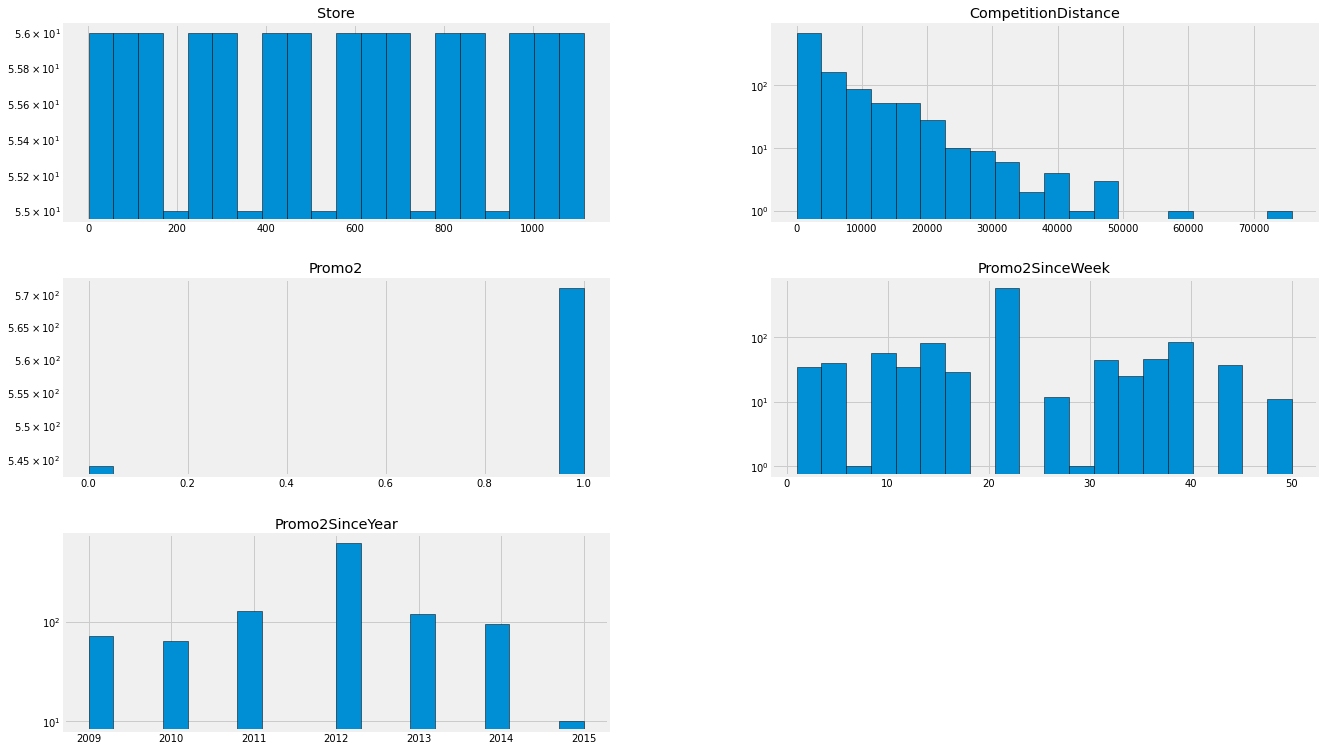

In [19]:
%matplotlib inline
store.hist(bins = 20, edgecolor = 'black', log = True, figsize = (20,13))
plt.show()
#full visualization of the store dataset

In [23]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [24]:
#Getting statistical summary of train numeric data sets
describe_num = df.describe(include =['float64','int64','float','int'])
describe_num.T.style.background_gradient(cmap ='viridis', low = 0.2, high = 0.1)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.000000,558.429727,321.908651,1.000000,280.000000,558.000000,838.000000,1115.000000
DayOfWeek,1017209.000000,3.998341,1.997391,1.000000,2.000000,4.000000,6.000000,7.000000
Sales,1017209.000000,5773.818972,3849.926175,0.000000,3727.000000,5744.000000,7856.000000,41551.000000
Customers,1017209.000000,633.145946,464.411734,0.000000,405.000000,609.000000,837.000000,7388.000000
Open,1017209.000000,0.830107,0.375539,0.000000,1.000000,1.000000,1.000000,1.000000
Promo,1017209.000000,0.381515,0.485759,0.000000,0.000000,0.000000,1.000000,1.000000
SchoolHoliday,1017209.000000,0.178647,0.383056,0.000000,0.000000,0.000000,0.000000,1.000000


In [25]:
#Getting statistical summary of train categorical data sets
describe_cat = df.describe(include=['O'])
describe_cat.T.style.background_gradient(cmap ='viridis', low = 0.2, high =0.1)

,count,unique,top,freq
Date,1017209,942,2015-07-31,1115
StateHoliday,1017209,5,0,855087


### Feature Engineering

In [26]:
#making a deep copy to aviod making changes in our original dataset
df1 = df.copy()

In [27]:
#changing our Date feature in train dataset to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

In [28]:
#checking to confirm change to datetime
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [29]:
#adding new features of year, month, week.
df1['Date_year'] = df1['Date'].dt.year
df1['Date_month'] = df1['Date'].dt.month
df1['Date_week'] = df1['Date'].dt.isocalendar().week

In [30]:
df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_week
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1


In [31]:
#making another deep copy.
df2 =  df1.copy()

In [32]:
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_week
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1


In [33]:
#dealing with categorical data before training our model
df2.replace({'DayOfWeek': {7:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}, 
             'Date_month':{1:'January',2:'February',3:'March',4:'April',5:'May',
                           6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}}, inplace = True)

In [34]:
#checking the changes
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_week
0,1,Friday,2015-07-31,5263,555,1,1,0,1,2015,July,31
1,2,Friday,2015-07-31,6064,625,1,1,0,1,2015,July,31
2,3,Friday,2015-07-31,8314,821,1,1,0,1,2015,July,31
3,4,Friday,2015-07-31,13995,1498,1,1,0,1,2015,July,31
4,5,Friday,2015-07-31,4822,559,1,1,0,1,2015,July,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,Tuesday,2013-01-01,0,0,0,0,a,1,2013,January,1
1017205,1112,Tuesday,2013-01-01,0,0,0,0,a,1,2013,January,1
1017206,1113,Tuesday,2013-01-01,0,0,0,0,a,1,2013,January,1
1017207,1114,Tuesday,2013-01-01,0,0,0,0,a,1,2013,January,1


### Data visualization of the train dataset in datetime

<AxesSubplot:xlabel='Date_year', ylabel='Sales'>

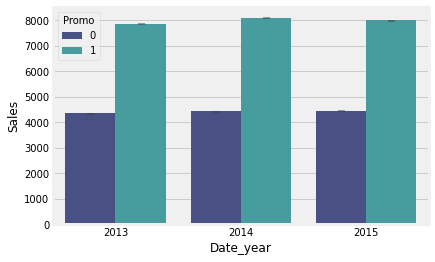

In [70]:
#Looking at the Date year and sales to promo
sns.barplot(x='Date_year', y='Sales', hue = 'Promo',data = df1, palette = 'mako')

 #### We see that in every Year, customer buying behaviour (i.e sales) is always very high with promo as 1 than  when its 0

<AxesSubplot:xlabel='Date_month', ylabel='Sales'>

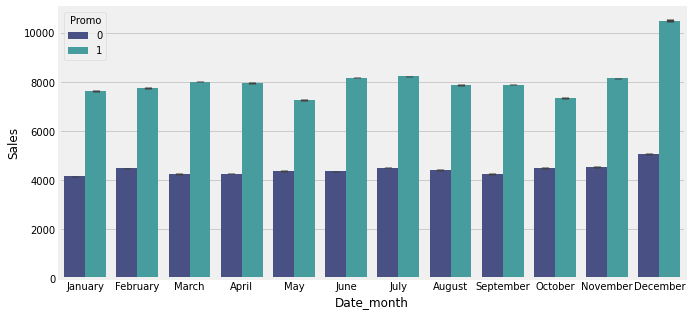

In [71]:
#Looking at the promo to the sales and the months
plt.figure(figsize=(10,5))
month = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']
sns.barplot(x='Date_month',y='Sales', hue = 'Promo',data = df2, palette = 'mako', order = month)

 #### Here, we see that when promo is 1 on the day of the month there is always a huge number of sales and december has the most sales when promo 1 while may with lowest sales when promo 1.

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

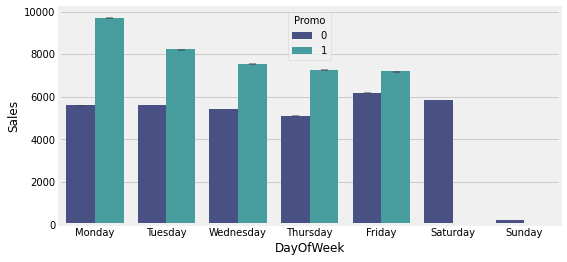

In [72]:
#Looking at the Sales for DAy of the week
plt.figure(figsize=(8,4))
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.barplot(x='DayOfWeek',y='Sales', hue = 'Promo', data = df2, palette = 'mako', order = days )

#### We can also see that on the days of the week when promo there is promo, there is always more sales than days(saturday and sunday) without promo.

### Merging store and train data together

In [64]:
train = store.merge(df1,on=['Store'],how = 'left')

In [65]:
train

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_week
0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-30,5020,546,1,1,0,1,2015,7,31
2,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-29,4782,523,1,1,0,1,2015,7,31
3,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-28,5011,560,1,1,0,1,2015,7,31
4,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-27,6102,612,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,2013,1,1
1017205,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,2013,1,1
1017206,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,2013,1,1
1017207,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-02,3697,305,1,0,0,1,2013,1,1


In [66]:
#dropping unimportant features
train_dataset =  train.drop(['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                             'Promo2','Promo2SinceWeek','Promo2SinceYear',
                             'Date','DayOfWeek','Date_year','Date_month','Date_week'], axis = 1)
train_dataset.head()

,Store,StoreType,Assortment,PromoInterval,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,"Jan,Apr,Jul,Oct",5263,555,1,1,0,1
1,1,c,a,"Jan,Apr,Jul,Oct",5020,546,1,1,0,1
2,1,c,a,"Jan,Apr,Jul,Oct",4782,523,1,1,0,1
3,1,c,a,"Jan,Apr,Jul,Oct",5011,560,1,1,0,1
4,1,c,a,"Jan,Apr,Jul,Oct",6102,612,1,1,0,1


### More relevant Data visualization

#### Looking at the distribution of customer and promo in the assortment, storetype and sales

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

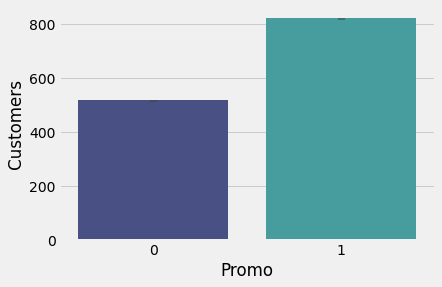

In [106]:
#Looking at promo to customers
sns.barplot(y = 'Customers', x = 'Promo', data = train_dataset, palette = 'mako')

<AxesSubplot:xlabel='StoreType', ylabel='count'>

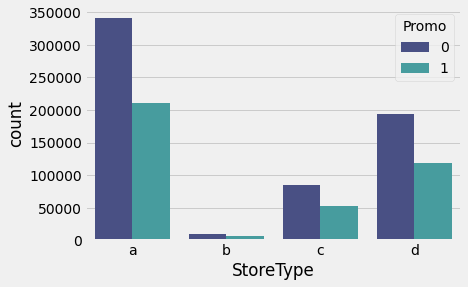

In [101]:
#looking at Promo to store type
sns.countplot(hue = 'Promo', x = 'StoreType', data = train_dataset, order = ['a','b','c','d'], palette = 'mako')

<AxesSubplot:xlabel='StoreType', ylabel='Customers'>

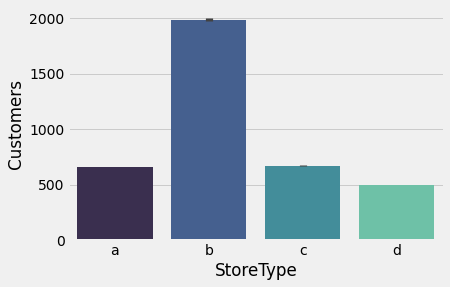

In [100]:
# Looking at customers to storeType
sns.barplot(y = 'Customers', x = 'StoreType', data = train_dataset, order = ['a','b','c','d'], palette='mako')

<AxesSubplot:xlabel='Assortment', ylabel='Customers'>

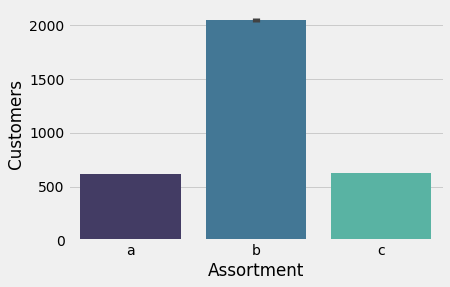

In [103]:
#Looking at Customers to  assortment
sns.barplot(y = 'Customers', x = 'Assortment', data = train_dataset, order = ['a','b','c'], palette='mako')

<AxesSubplot:xlabel='StoreType', ylabel='count'>

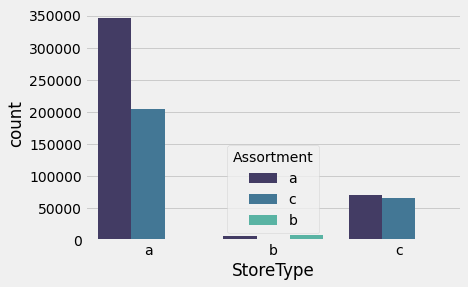

In [105]:
#Checking assortment of each store types
sns.countplot(x = 'StoreType', hue = 'Assortment', data = train_dataset, order = ['a','b','c'], palette='mako')

#### From the previous visualisations we see that store B with the least amount of Dataset has more customers and sales because ceratin customers only buy assortment B which is only sold in store B.

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

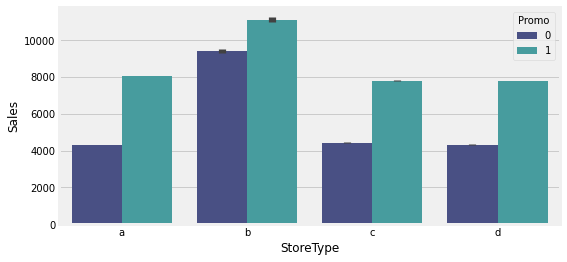

In [73]:
#How storetype is related to promo from sales
plt.figure(figsize=(8,4))
storetype = ['a','b','c','d']
sns.barplot(x ='StoreType', y='Sales', hue = 'Promo', data = train_dataset, palette = 'mako', order = storetype)
#we see store b has a lot of sales.

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

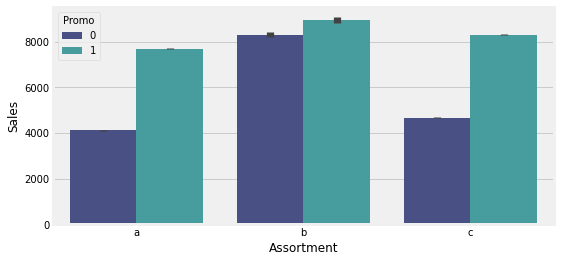

In [74]:
#Looking at the assortment and sales to promo
plt.figure(figsize=(8,4))
assortment = ['a','b','c']
sns.barplot(x ='Assortment', y='Sales', hue = 'Promo', 
            data = train_dataset, palette = 'mako', order = assortment)

### In conclusion, promo is significantly important to the customer buying behaviour.